In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import absolute
from matplotlib.image import imread
import cv2 
import re
from sklearn.preprocessing import MinMaxScaler

## Cargar datos

In [2]:
df=pd.read_csv('train_set.csv')
df

,Unnamed: 0,id_img,paths,label
0,0,100,data\train\happy\100.jpg,happy
1,1,10000,data\train\happy\10000.jpg,happy
2,2,10001,data\train\happy\10001.jpg,happy
3,3,10005,data\train\happy\10005.jpg,happy
4,4,10035,data\train\happy\10035.jpg,happy
...,...,...,...,...
12097,12097,9966,data\train\sadness\9966.jpg,sadness
12098,12098,9974,data\train\sadness\9974.jpg,sadness
12099,12099,9976,data\train\sadness\9976.jpg,sadness
12100,12100,9986,data\train\sadness\9986.jpg,sadness


In [3]:
df.info() #no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12102 entries, 0 to 12101
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12102 non-null  int64 
 1   id_img      12102 non-null  int64 
 2   paths       12102 non-null  object
 3   label       12102 non-null  object
dtypes: int64(2), object(2)
memory usage: 378.3+ KB


In [4]:
df=df.drop(columns='Unnamed: 0')
df

,id_img,paths,label
0,100,data\train\happy\100.jpg,happy
1,10000,data\train\happy\10000.jpg,happy
2,10001,data\train\happy\10001.jpg,happy
3,10005,data\train\happy\10005.jpg,happy
4,10035,data\train\happy\10035.jpg,happy
...,...,...,...
12097,9966,data\train\sadness\9966.jpg,sadness
12098,9974,data\train\sadness\9974.jpg,sadness
12099,9976,data\train\sadness\9976.jpg,sadness
12100,9986,data\train\sadness\9986.jpg,sadness


#### Cargamos las imágenes

In [5]:
def cargar_imagenes(df):
    images=[]

    for path in df['paths']:
        image = imread(path)
        image=image.reshape((image.shape[0] * image.shape[1])) 
        images.append(image)
    
    return images


In [6]:
X=np.array(cargar_imagenes(df), dtype=np.uint8)
y=df['label']

In [7]:
print(X.shape)
print(y.shape)
print(X)

(12102, 2304)
(12102,)
[[162 163 158 ... 194 192 197]
 [134 127 134 ...  34  36  32]
 [253 253 247 ... 124 120 114]
 ...
 [ 44  44  45 ... 171 193 199]
 [109  23  21 ...  21  24  53]
 [ 92  86  87 ... 102 107  97]]


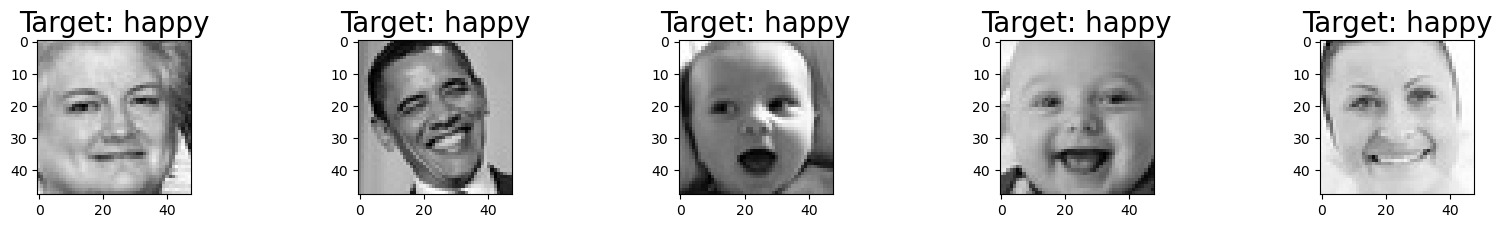

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))

for index, image in enumerate(X[0:5]):
    plt.subplot(1,5,index+1)
    label = df['label'][index]
    plt.imshow(np.reshape(image,(48,48)), cmap=plt.cm.gray)
    plt.title('Target: '+ str(label), fontsize=20)

## Dividir en train y test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.20,
                                                   random_state=42)

# X_train.reshape(-1, 3)
# X_test.reshape(-1, 3)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9681, 2304)
(2421, 2304)
(9681,)
(2421,)


In [11]:
# plt.pie(np.unique(y_train, return_counts=True),
#         explode=(0, 0, 0, 0, 0, 0) , 
#         labels=['happy','sadness'],
#         autopct='%1.1f%%')
# plt.axis('equal')
# plt.title('Proportion of each observed category')
# plt.show()

#### Comprobamos si las clases están desbalanceadas

In [12]:
pd.Series(y_train).value_counts(normalize=True)

happy      0.591055
sadness    0.408945
Name: label, dtype: float64

### Escalar

In [13]:
# X_train = X_train / 255.0 
# X_test = X_test / 255.0

## Entrenar modelos

### Catboost

In [27]:
cb=CatBoostClassifier(
                        iterations=3000,
                        l2_leaf_reg=6,
                       learning_rate=0.1,
                      depth=5,
                      thread_count=6,
                      verbose=False)

In [28]:
cb.fit(X_train, y_train)

### Métricas de error

In [29]:
predictions_train_cb = cb.predict(X_train)
predictions_test_cb = cb.predict(X_test)

print(classification_report(y_train, predictions_train_cb))
print('\n')

print(classification_report(y_test, predictions_test_cb))

              precision    recall  f1-score   support

       happy       1.00      1.00      1.00      5722
     sadness       1.00      1.00      1.00      3959

    accuracy                           1.00      9681
   macro avg       1.00      1.00      1.00      9681
weighted avg       1.00      1.00      1.00      9681



              precision    recall  f1-score   support

       happy       0.80      0.83      0.81      1442
     sadness       0.73      0.69      0.71       979

    accuracy                           0.77      2421
   macro avg       0.77      0.76      0.76      2421
weighted avg       0.77      0.77      0.77      2421



### Entrenamos el modelo con todo el cojunto

In [ ]:
cb=CatBoostClassifier(
                        iterations=3000,
                        l2_leaf_reg=6,
                       learning_rate=0.1,
                      depth=5,
                      thread_count=6,
                      verbose=False)

In [ ]:
cb.fit(X, y)

## Predecir con nuevos datos (archivo test)

In [ ]:
df_test=pd.read_csv('test_set.csv')
df_test

In [ ]:
test=np.array(cargar_imagenes(df_test), dtype=np.uint8)

In [ ]:
# test = test / 255.0

In [ ]:
pred= cb.predict(test)

In [ ]:
for index, valor in enumerate(pred):
    df_test.loc[index,['label']]=valor

df_test

In [ ]:
df_test=df_test[['id_img','label']]
df_test

In [ ]:
# df_test.to_csv('Catboost2.csv', sep=',', index=False)

In [ ]:
df_test['label'].value_counts()